In [2]:
import numpy as np
from sklearn.datasets import load_breast_cancer, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

### Download data...

Using the classic breast cancer dataset with an 80/20 train/test split on 2 randomnly sampled predictors (sticking with 2 predictors to visualize results)
```
=================   ==============
Classes                          2
Samples per class    212(M),357(B)
Samples total                  569
Dimensionality                  30
Features            real, positive
=================   ==============
```

In [3]:
# X, y = load_breast_cancer(return_X_y=True)
# X = X[:, np.random.choice(range(0, 30), 2)]

### Or generate your own

In [4]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=6, random_state=10)

### Split the data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

### Get a dictionary going for the models

In [6]:
models = {}

### Lil plotting function

In [7]:
def plot_decision_boundary(X, y, model, scale=True):
    if scale:
        ss = StandardScaler()
        X = ss.fit_transform(X)
    
    model.fit(X, y)
    
    plot_step = 0.02
    plot_step_coarser = 0.5

    # Now plot the decision boundary using a fine mesh as input to a
    # filled contour plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                          vmin=0, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])

    ax.scatter(X[:,0], X[:, 1], c=y, s=50,
               cmap="RdBu", vmin=-.2, vmax=1.2,
               edgecolor="white", linewidth=1)

    ax.set(aspect="equal", xlabel="$x1$", ylabel="$x2$")
    
    return model

### Modeling

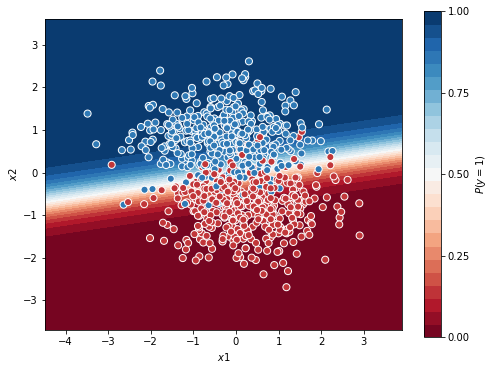

In [8]:
models['lr'] = plot_decision_boundary(X_train, y_train, LogisticRegression(solver='lbfgs'))

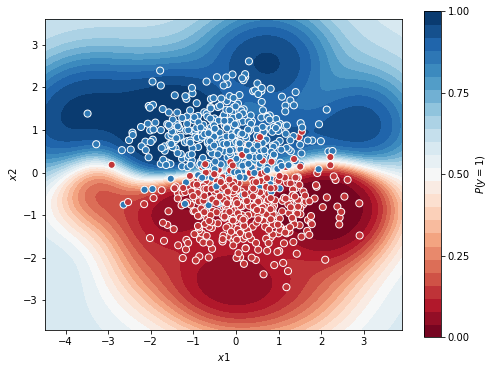

In [9]:
models['svm_rbf'] = plot_decision_boundary(X_train, y_train, SVC(C=10, probability=True))

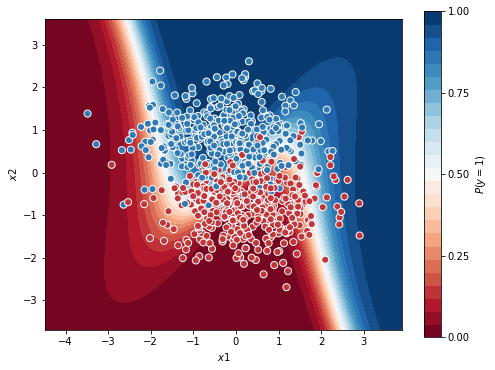

In [10]:
models['svm_sig'] = plot_decision_boundary(X_train, y_train, SVC(probability=True, kernel='sigmoid'))

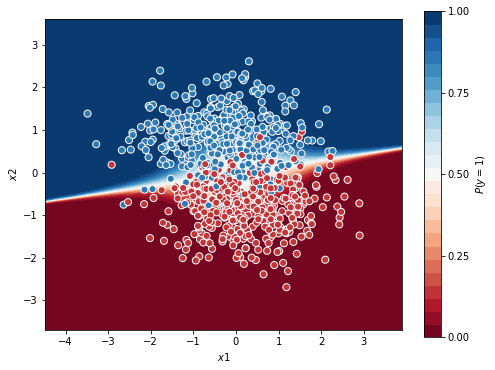

In [11]:
models['svm_poly'] = plot_decision_boundary(X_train, y_train, SVC(probability=True, kernel='poly'))

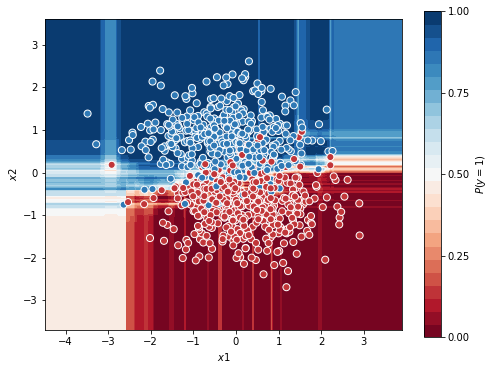

In [14]:
models['rfc'] = plot_decision_boundary(X_train, y_train, RandomForestClassifier(n_estimators=100))

In [15]:
for model_name, model in models.items():
    print(model_name)
    print(classification_report(y_test, model.predict(X_test)))

lr
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       100
           1       0.96      0.79      0.87       100

    accuracy                           0.88       200
   macro avg       0.89      0.88      0.88       200
weighted avg       0.89      0.88      0.88       200

svm_rbf
              precision    recall  f1-score   support

           0       0.71      0.05      0.09       100
           1       0.51      0.98      0.67       100

    accuracy                           0.52       200
   macro avg       0.61      0.52      0.38       200
weighted avg       0.61      0.52      0.38       200

svm_sig
              precision    recall  f1-score   support

           0       0.74      0.53      0.62       100
           1       0.63      0.81      0.71       100

    accuracy                           0.67       200
   macro avg       0.68      0.67      0.66       200
weighted avg       0.68      0.67      0.66       200

